In [ ]:
!pip install lightgbm scikit-learn


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load dataset
df = pd.read_csv('/content/Global Health Statistics.csv')
print(df.shape)
df.head()


(1000000, 22)


,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
0,Italy,2013,Malaria,Respiratory,0.95,1.55,8.42,0-18,Male,471007,...,7.58,Medication,21064,No,91.82,4493,2.16,16886,0.79,86.02
1,France,2002,Ebola,Parasitic,12.46,8.63,8.75,61+,Male,634318,...,5.11,Surgery,47851,Yes,76.65,2366,4.82,80639,0.74,45.52
2,Turkey,2015,COVID-19,Genetic,0.91,2.35,6.22,36-60,Male,154878,...,3.49,Vaccination,27834,Yes,98.55,41,5.81,12245,0.41,40.20
3,Indonesia,2011,Parkinson's Disease,Autoimmune,4.68,6.29,3.99,0-18,Other,446224,...,8.44,Surgery,144,Yes,67.35,3201,2.22,49336,0.49,58.47
4,Italy,2013,Tuberculosis,Genetic,0.83,13.59,7.01,61+,Male,472908,...,5.90,Medication,8908,Yes,50.06,2832,6.93,47701,0.50,48.14


In [ ]:
# Drop columns that would not help predicting mortality directly
drop_cols = ['Disease Name', 'Mortality Rate (%)', 'Recovery Rate (%)', 'Prevalence Rate (%)']
X = df.drop(columns=drop_cols)

# We will predict Mortality Rate first
y = df['Mortality Rate (%)']

# Encode categorical variables
cat_cols = X.select_dtypes(include=['object']).columns
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Scale numerical features
scaler = StandardScaler()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[num_cols] = scaler.fit_transform(X[num_cols])

X.head()


,Country,Year,Disease Category,Incidence Rate (%),Age Group,Gender,Population Affected,Healthcare Access (%),Doctors per 1000,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
0,-0.088279,0.138972,1.264797,-1.396856,-1.341699,0.000149,-0.102988,-1.194751,0.455767,0.850961,-1.342771,-0.274006,-1.000708,1.380860,-0.984176,-1.163545,0.968570,1.535309
1,-0.782092,-1.385147,0.948517,0.250060,1.342454,0.000149,0.462768,0.985164,-1.091499,-0.049558,-0.447777,1.585909,0.999292,-0.092210,-0.063218,1.055730,0.622483,-0.468250
2,1.299345,0.416085,-0.316602,-1.210764,0.447737,0.000149,-1.198148,-1.286880,1.017709,-0.640182,1.342211,0.196058,0.999292,-1.702407,0.279544,-1.325101,-1.661695,-0.731433
3,-0.261733,-0.138140,-1.581722,-0.294260,-1.341699,1.225209,-0.188843,0.707393,0.332601,1.164502,-0.447777,-1.726555,0.999292,0.486075,-0.963403,-0.033944,-1.107955,0.172394
4,-0.088279,0.138972,-0.316602,1.403832,1.342454,0.000149,-0.096402,-0.553315,1.433392,0.238462,-1.342771,-1.118040,0.999292,0.230521,0.667316,-0.090859,-1.038737,-0.338637


Correlation Matrix:
                                  Year  Prevalence Rate (%)  \
Year                          1.000000            -0.000818   
Prevalence Rate (%)          -0.000818             1.000000   
Incidence Rate (%)           -0.000944             0.000338   
Mortality Rate (%)            0.000448             0.001284   
Population Affected           0.000686             0.000622   
Healthcare Access (%)        -0.001291            -0.000231   
Doctors per 1000             -0.000027             0.000418   
Hospital Beds per 1000       -0.000645             0.000468   
Average Treatment Cost (USD)  0.001275            -0.001128   
Recovery Rate (%)            -0.000273            -0.000201   
DALYs                         0.000816             0.000535   
Improvement in 5 Years (%)   -0.001223             0.000037   
Per Capita Income (USD)       0.000206             0.001049   
Education Index              -0.000610            -0.000185   
Urbanization Rate (%)         0.000

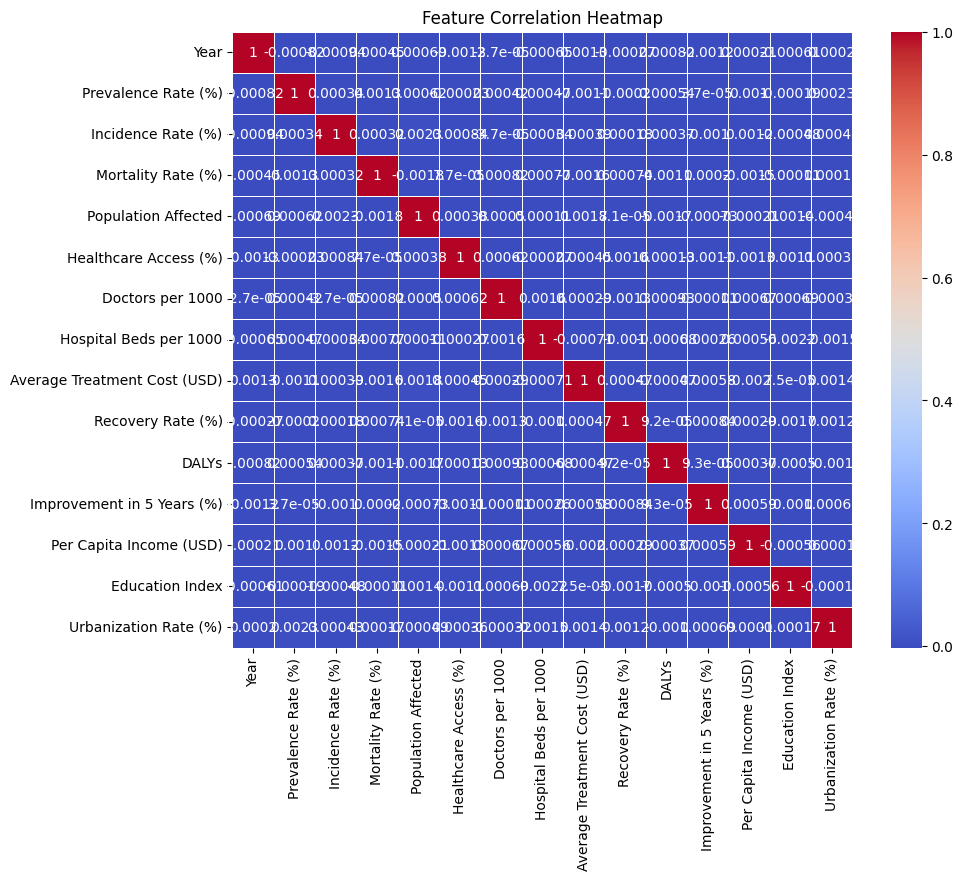

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Global Health Statistics.csv')

# Drop missing values if any
df = df.dropna()

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot a heatmap for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the data
df = pd.read_csv('/content/Global Health Statistics.csv')

# Basic stats for Mortality Rate
print(df['Mortality Rate (%)'].describe())

# Encode categorical features
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Correlation with Mortality Rate
correlations = df_encoded.corr()['Mortality Rate (%)'].sort_values(ascending=False)
print(correlations.head(15))  # Show top 15 features correlated with mortality


count    1000000.000000
mean           5.049919
std            2.859427
min            0.100000
25%            2.580000
50%            5.050000
75%            7.530000
max           10.000000
Name: Mortality Rate (%), dtype: float64
Mortality Rate (%)                    1.000000
Gender                                0.001437
Prevalence Rate (%)                   0.001284
Disease Category                      0.001231
Doctors per 1000                      0.000820
Hospital Beds per 1000                0.000769
Recovery Rate (%)                     0.000736
Year                                  0.000448
Disease Name                          0.000358
Incidence Rate (%)                    0.000323
Improvement in 5 Years (%)            0.000197
Urbanization Rate (%)                 0.000169
Healthcare Access (%)                 0.000077
Education Index                      -0.000110
Availability of Vaccines/Treatment   -0.000368
Name: Mortality Rate (%), dtype: float64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load dataset
df = pd.read_csv('/content/Global Health Statistics.csv')

# Drop columns that would leak the target
drop_cols = ['Disease Name', 'Mortality Rate (%)', 'Recovery Rate (%)', 'Prevalence Rate (%)']
X = df.drop(columns=drop_cols)

# Our new target = Recovery Rate
y = df['Recovery Rate (%)']

# Encode categorical features
cat_cols = X.select_dtypes(include='object').columns
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Scale numerical features
scaler = StandardScaler()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[num_cols] = scaler.fit_transform(X[num_cols])

print(X.shape)
X.head()


(1000000, 18)


,Country,Year,Disease Category,Incidence Rate (%),Age Group,Gender,Population Affected,Healthcare Access (%),Doctors per 1000,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
0,-0.088279,0.138972,1.264797,-1.396856,-1.341699,0.000149,-0.102988,-1.194751,0.455767,0.850961,-1.342771,-0.274006,-1.000708,1.380860,-0.984176,-1.163545,0.968570,1.535309
1,-0.782092,-1.385147,0.948517,0.250060,1.342454,0.000149,0.462768,0.985164,-1.091499,-0.049558,-0.447777,1.585909,0.999292,-0.092210,-0.063218,1.055730,0.622483,-0.468250
2,1.299345,0.416085,-0.316602,-1.210764,0.447737,0.000149,-1.198148,-1.286880,1.017709,-0.640182,1.342211,0.196058,0.999292,-1.702407,0.279544,-1.325101,-1.661695,-0.731433
3,-0.261733,-0.138140,-1.581722,-0.294260,-1.341699,1.225209,-0.188843,0.707393,0.332601,1.164502,-0.447777,-1.726555,0.999292,0.486075,-0.963403,-0.033944,-1.107955,0.172394
4,-0.088279,0.138972,-0.316602,1.403832,1.342454,0.000149,-0.096402,-0.553315,1.433392,0.238462,-1.342771,-1.118040,0.999292,0.230521,0.667316,-0.090859,-1.038737,-0.338637


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Build the model
model = lgb.LGBMRegressor(
    random_state=42,
    n_estimators=1000,
    learning_rate=0.05
)

# Fit with early stopping
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=100)
    ]
)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2676
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 18
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 74.488968
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's l2: 199.836


LGBMRegressor(learning_rate=0.05, n_estimators=1000, random_state=42)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np


In [ ]:
# Load your data
df = pd.read_csv('/content/Global Health Statistics.csv')

# Group: Average Recovery Rate by Year and Disease Category
grouped = df.groupby(['Year', 'Disease Category'])['Recovery Rate (%)'].mean().reset_index()

# Show a few entries
grouped.head()


,Year,Disease Category,Recovery Rate (%)
0,2000,Autoimmune,74.203565
1,2000,Bacterial,74.514370
2,2000,Cardiovascular,74.452945
3,2000,Chronic,74.677378
4,2000,Genetic,74.102657


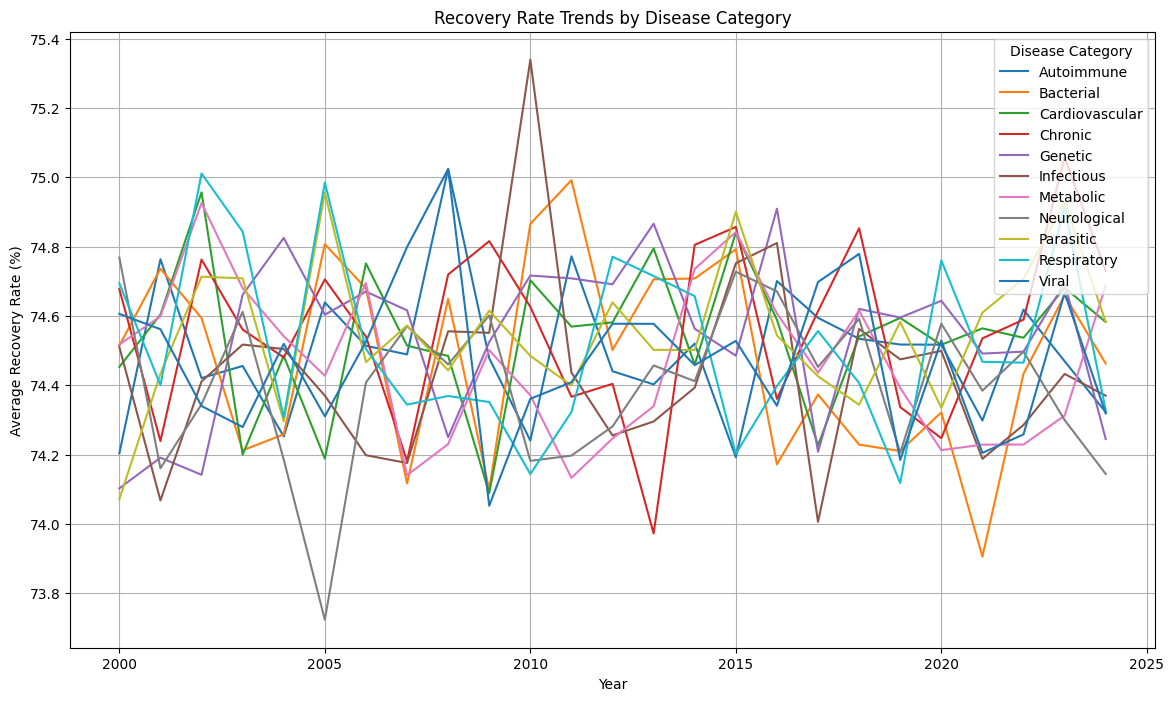

In [ ]:
# Pivot to make plotting easier
pivot = grouped.pivot(index='Year', columns='Disease Category', values='Recovery Rate (%)')

# Plot
pivot.plot(figsize=(14,8))
plt.title("Recovery Rate Trends by Disease Category")
plt.ylabel("Average Recovery Rate (%)")
plt.grid()
plt.show()


In [ ]:
# Forecast for each disease separately
future_years = np.arange(2025, 2036).reshape(-1, 1)  # Next 11 years

# Store forecasts
forecasts = {}

for disease in pivot.columns:
    # Prepare X and y
    X = pivot.index.values.reshape(-1, 1)  # Years as X
    y = pivot[disease].values              # Recovery rate as y

    # Train simple Linear Regression
    model = LinearRegression()
    model.fit(X, y)

    # Predict future
    future_preds = model.predict(future_years)

    # Save
    forecasts[disease] = future_preds

# Combine into DataFrame
forecast_df = pd.DataFrame(forecasts, index=future_years.flatten())

forecast_df.head()


,Autoimmune,Bacterial,Cardiovascular,Chronic,Genetic,Infectious,Metabolic,Neurological,Parasitic,Respiratory,Viral
2025,74.482199,74.366268,74.583148,74.620655,74.618844,74.435637,74.360428,74.421311,74.633051,74.436641,74.431164
2026,74.481200,74.357527,74.586448,74.625205,74.624842,74.435419,74.352315,74.423213,74.639403,74.430121,74.427693
2027,74.480201,74.348785,74.589748,74.629755,74.630841,74.435202,74.344202,74.425115,74.645754,74.423601,74.424222
2028,74.479203,74.340044,74.593048,74.634305,74.636840,74.434984,74.336089,74.427017,74.652106,74.417081,74.420751
2029,74.478204,74.331302,74.596348,74.638855,74.642838,74.434766,74.327976,74.428920,74.658458,74.410561,74.417280


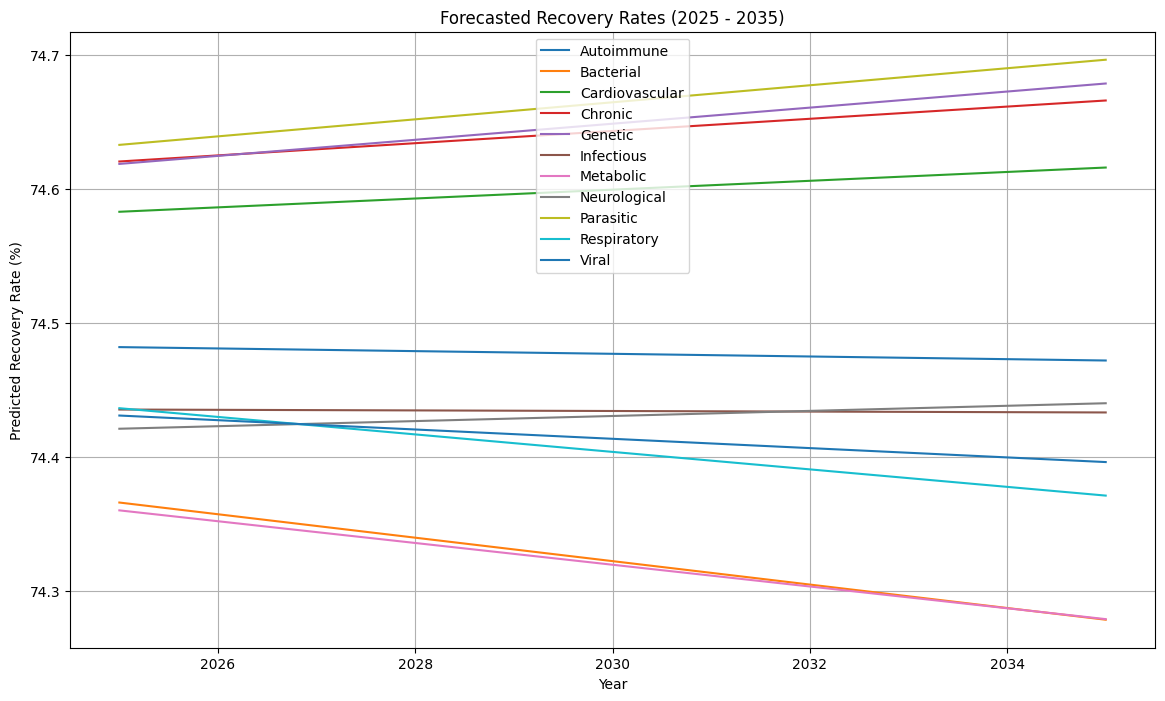

In [ ]:
forecast_df.plot(figsize=(14,8))
plt.title("Forecasted Recovery Rates (2025 - 2035)")
plt.ylabel("Predicted Recovery Rate (%)")
plt.xlabel("Year")
plt.grid()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load data
df = pd.read_csv('/content/Global Health Statistics.csv')

# Group
grouped = df.groupby(['Year', 'Disease Category'])['Recovery Rate (%)'].mean().reset_index()

# Pivot
pivot = grouped.pivot(index='Year', columns='Disease Category', values='Recovery Rate (%)')

# Calculate slopes
slopes = {}

for disease in pivot.columns:
    X = pivot.index.values.reshape(-1,1)
    y = pivot[disease].values
    model = LinearRegression()
    model.fit(X, y)
    slope = model.coef_[0]
    slopes[disease] = slope

# Sort diseases by slope
slope_df = pd.DataFrame.from_dict(slopes, orient='index', columns=['Slope'])
slope_df = slope_df.sort_values('Slope', ascending=False)

print("🔥 Disease Trends (Sorted by Improvement):")
print(slope_df)


🔥 Disease Trends (Sorted by Improvement):
                   Slope
Parasitic       0.006352
Genetic         0.005999
Chronic         0.004550
Cardiovascular  0.003300
Neurological    0.001902
Infectious     -0.000218
Autoimmune     -0.000999
Viral          -0.003471
Respiratory    -0.006520
Metabolic      -0.008113
Bacterial      -0.008742


<ipython-input-21-1c75e86be865>:28: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


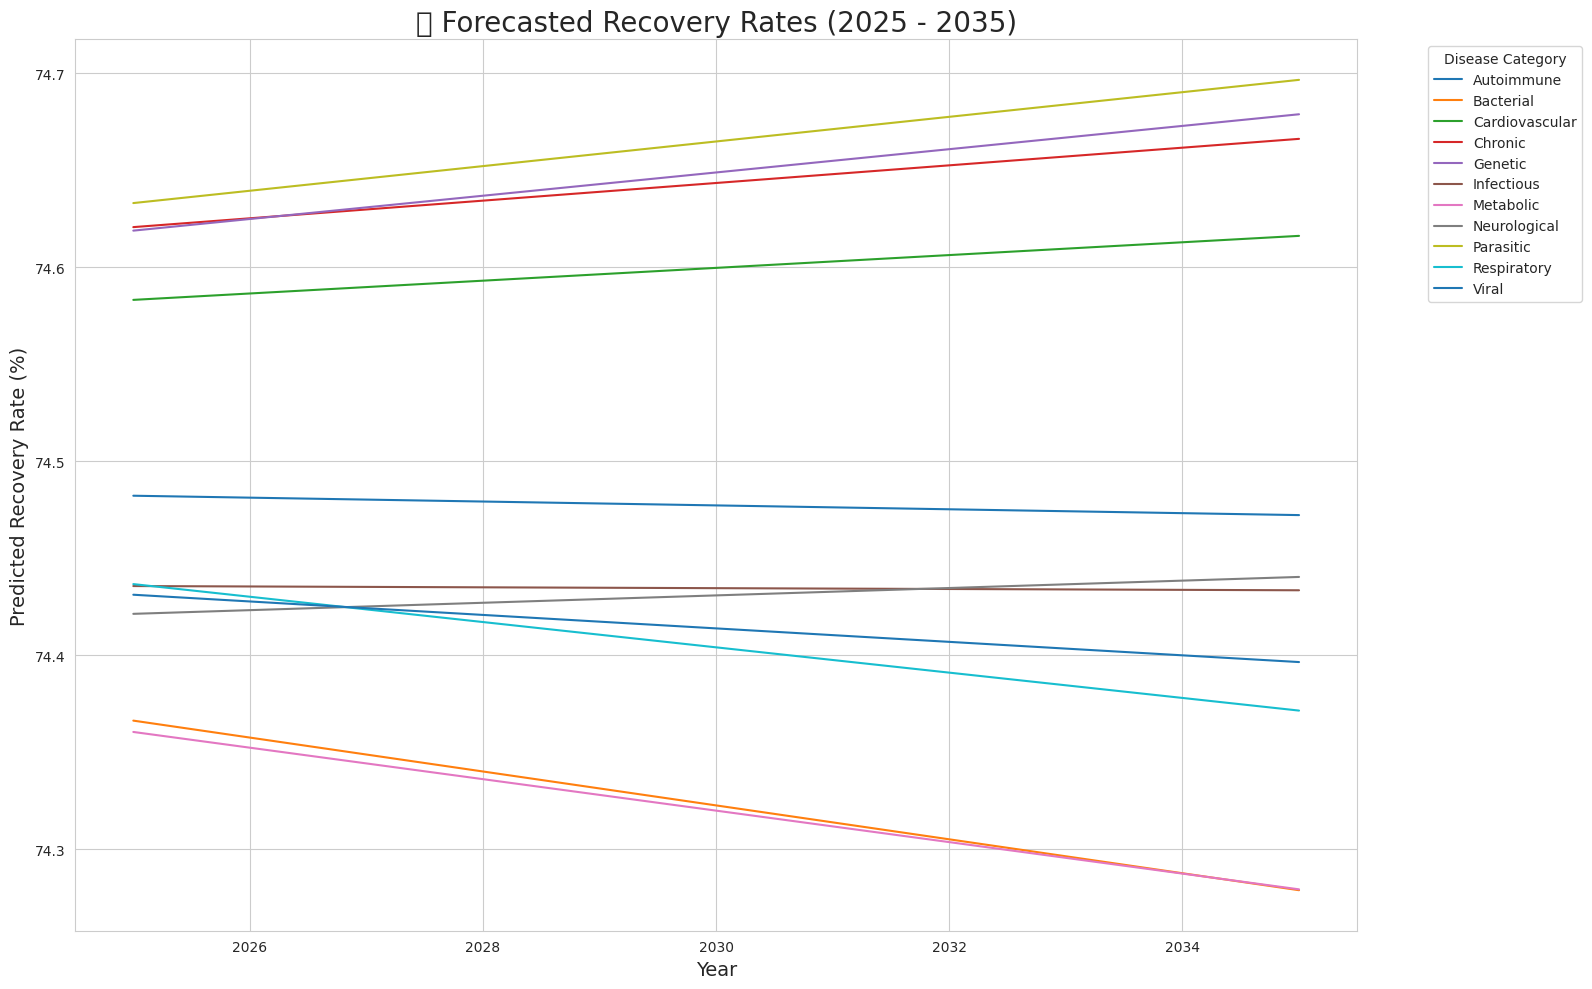

In [ ]:
# Forecast same way as before
future_years = np.arange(2025, 2036).reshape(-1, 1)

forecasts = {}
for disease in pivot.columns:
    X = pivot.index.values.reshape(-1, 1)
    y = pivot[disease].values
    model = LinearRegression()
    model.fit(X, y)
    future_preds = model.predict(future_years)
    forecasts[disease] = future_preds

forecast_df = pd.DataFrame(forecasts, index=future_years.flatten())

# Now polish the plot
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))

for disease in forecast_df.columns:
    plt.plot(forecast_df.index, forecast_df[disease], label=disease)

plt.title('✨ Forecasted Recovery Rates (2025 - 2035)', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Predicted Recovery Rate (%)', fontsize=14)
plt.legend(title="Disease Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Top 5 Diseases with Most Recovery Improvement:
                   Slope
Parasitic       0.006352
Genetic         0.005999
Chronic         0.004550
Cardiovascular  0.003300
Neurological    0.001902

Top 5 Diseases with Declining Recovery:
                Slope
Autoimmune  -0.000999
Viral       -0.003471
Respiratory -0.006520
Metabolic   -0.008113
Bacterial   -0.008742


<ipython-input-22-4d5ab95be300>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=slope_df.index, y=slope_df['Slope'], palette=colors)
<ipython-input-22-4d5ab95be300>:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


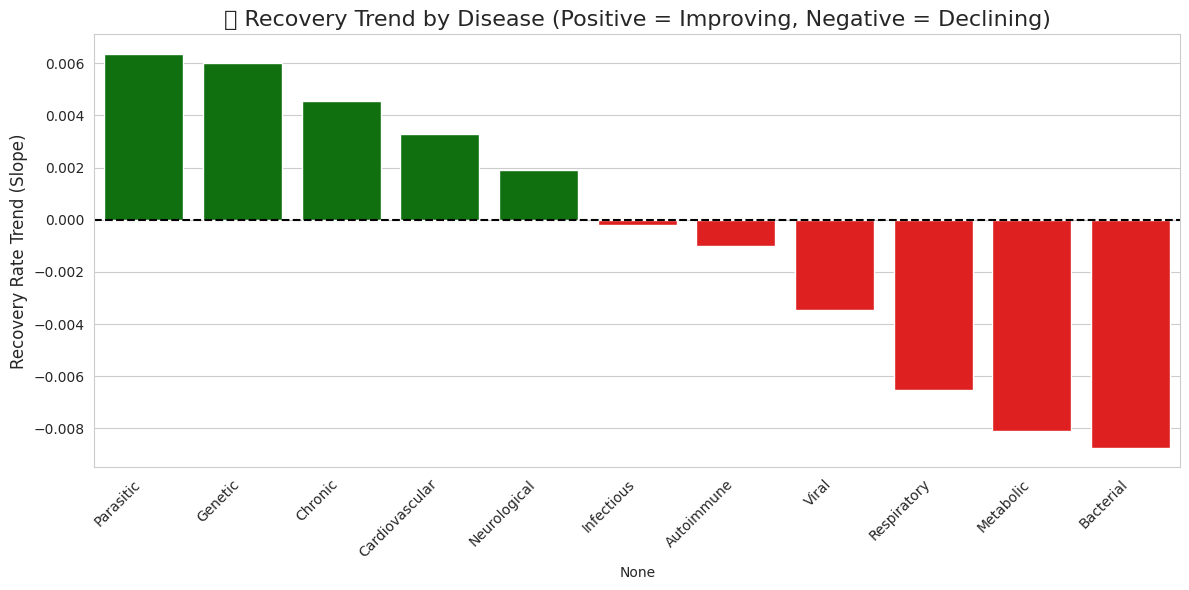

In [ ]:
# Display Top 5 improving diseases
print("Top 5 Diseases with Most Recovery Improvement:")
print(slope_df.head(5))

# Display Top 5 declining diseases
print("\nTop 5 Diseases with Declining Recovery:")
print(slope_df.tail(5))

# Plot again but highlight trends
colors = ['green' if slope > 0 else 'red' for slope in slope_df['Slope']]

plt.figure(figsize=(12, 6))
sns.barplot(x=slope_df.index, y=slope_df['Slope'], palette=colors)
plt.axhline(0, color='black', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.title('📊 Recovery Trend by Disease (Positive = Improving, Negative = Declining)', fontsize=16)
plt.ylabel('Recovery Rate Trend (Slope)', fontsize=12)
plt.tight_layout()
plt.show()


Mean Absolute Error (MAE): 12.2907
Root Mean Squared Error (RMSE): 14.1971


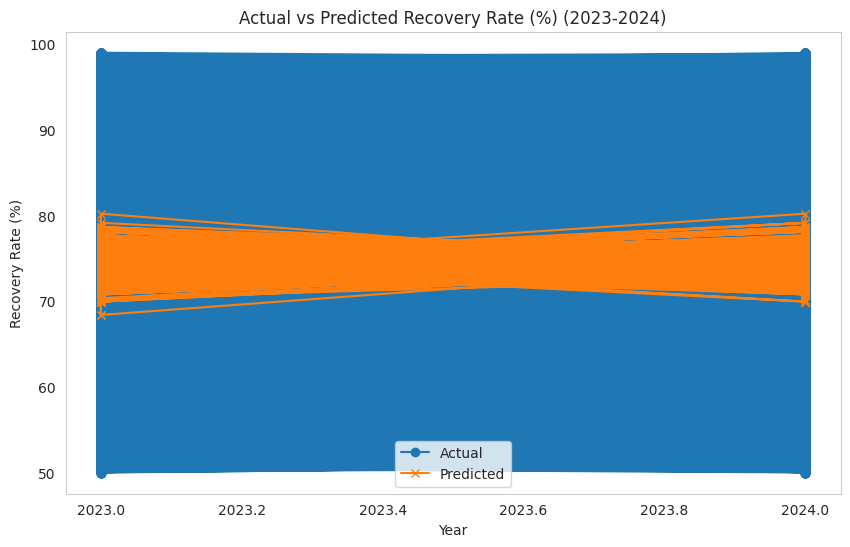

In [ ]:
# Install if missing
# pip install pandas matplotlib scikit-learn xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor

# Load your data
df = pd.read_csv('/content/Global Health Statistics.csv')  # Replace with your actual CSV file

# Features and Target
features = ['Healthcare Access (%)', 'Education Index']
target = 'Recovery Rate (%)'

# Make sure the Year column is numeric
df['Year'] = pd.to_numeric(df['Year'])

# Split into Train and Test based on Year
train_df = df[df['Year'] <= 2022]
test_df = df[df['Year'] > 2022]

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# Model: XGBoost Regressor
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Forecast
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Compare Actual vs Predicted
comparison = test_df[['Year']].copy()
comparison['Actual Recovery Rate (%)'] = y_test.values
comparison['Predicted Recovery Rate (%)'] = y_pred

# Plot
plt.figure(figsize=(10,6))
plt.plot(comparison['Year'], comparison['Actual Recovery Rate (%)'], label='Actual', marker='o')
plt.plot(comparison['Year'], comparison['Predicted Recovery Rate (%)'], label='Predicted', marker='x')
plt.title('Actual vs Predicted Recovery Rate (%) (2023-2024)')
plt.xlabel('Year')
plt.ylabel('Recovery Rate (%)')
plt.legend()
plt.grid()
plt.show()


Mean Absolute Error (MAE) Mortality: 2.4791
Root Mean Squared Error (RMSE) Mortality: 2.8640


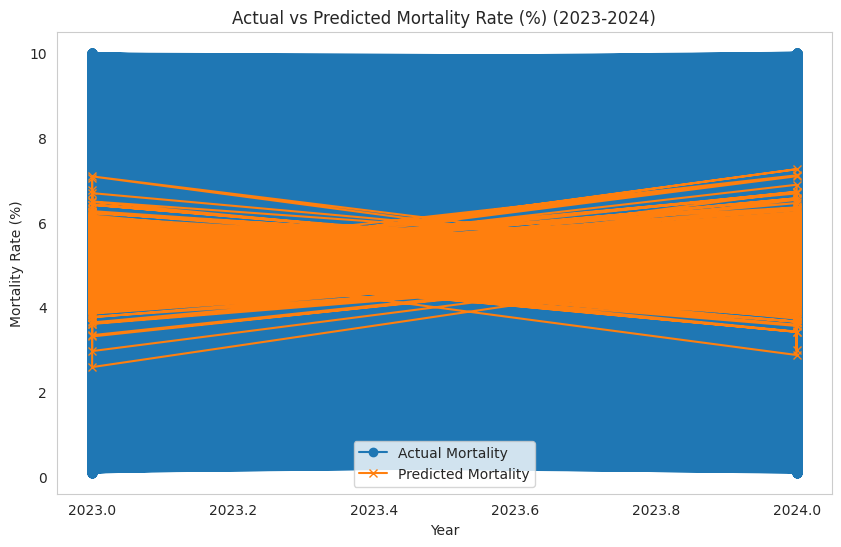

In [ ]:
# New Features and Target
features_mortality = ['Healthcare Access (%)', 'Education Index', 'Recovery Rate (%)']
target_mortality = 'Mortality Rate (%)'

# Prepare Train-Test
X_train_mortality = train_df[features_mortality]
y_train_mortality = train_df[target_mortality]
X_test_mortality = test_df[features_mortality]
y_test_mortality = test_df[target_mortality]

# Model
model_mortality = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model_mortality.fit(X_train_mortality, y_train_mortality)

# Forecast
y_pred_mortality = model_mortality.predict(X_test_mortality)

# Evaluate
mae_mortality = mean_absolute_error(y_test_mortality, y_pred_mortality)
rmse_mortality = np.sqrt(mean_squared_error(y_test_mortality, y_pred_mortality))

print(f"Mean Absolute Error (MAE) Mortality: {mae_mortality:.4f}")
print(f"Root Mean Squared Error (RMSE) Mortality: {rmse_mortality:.4f}")

# Plot
plt.figure(figsize=(10,6))
plt.plot(test_df['Year'], y_test_mortality, label='Actual Mortality', marker='o')
plt.plot(test_df['Year'], y_pred_mortality, label='Predicted Mortality', marker='x')
plt.title('Actual vs Predicted Mortality Rate (%) (2023-2024)')
plt.xlabel('Year')
plt.ylabel('Mortality Rate (%)')
plt.legend()
plt.grid()
plt.show()


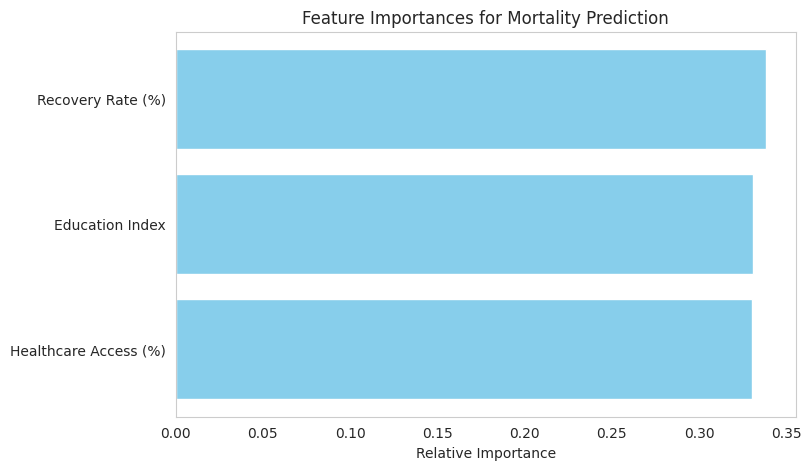

In [ ]:
# Feature Importance Plot for Mortality Model
importances = model_mortality.feature_importances_
feature_names = features_mortality

# Sort Features
indices = np.argsort(importances)

# Plot
plt.figure(figsize=(8,5))
plt.title('Feature Importances for Mortality Prediction')
plt.barh(range(len(indices)), importances[indices], color='skyblue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid()
plt.show()


In [ ]:
# STEP A: Setup Future Data for 2025-2035

import numpy as np
import pandas as pd

# 1. Define future years (2025 to 2035)
years = np.arange(2025, 2036)

# 2. Assume reasonable values for important features
# These are assumptions based on slight improvements over time
recovery_rate_base = np.linspace(74.5, 75.5, len(years))  # Recovery Rate (%)
education_index_base = np.full(len(years), 0.8)            # Education Index stays constant at 0.8
healthcare_access_base = np.full(len(years), 70)           # Healthcare Access (%) stays at 70%

# 3. Create a base DataFrame
future_data_base = pd.DataFrame({
    'Year': years,
    'Recovery Rate (%)': recovery_rate_base,
    'Education Index': education_index_base,
    'Healthcare Access (%)': healthcare_access_base
})

# 4. Display the future data
print(future_data_base)
# STEP A: Setup Future Data for 2025-2035

import numpy as np
import pandas as pd

# 1. Define future years (2025 to 2035)
years = np.arange(2025, 2036)

# 2. Assume reasonable values for important features
# These are assumptions based on slight improvements over time
recovery_rate_base = np.linspace(74.5, 75.5, len(years))  # Recovery Rate (%)
education_index_base = np.full(len(years), 0.8)            # Education Index stays constant at 0.8
healthcare_access_base = np.full(len(years), 70)           # Healthcare Access (%) stays at 70%

# 3. Create a base DataFrame
future_data_base = pd.DataFrame({
    'Year': years,
    'Recovery Rate (%)': recovery_rate_base,
    'Education Index': education_index_base,
    'Healthcare Access (%)': healthcare_access_base
})

# 4. Display the future data
print(future_data_base)


    Year  Recovery Rate (%)  Education Index  Healthcare Access (%)
0   2025               74.5              0.8                     70
1   2026               74.6              0.8                     70
2   2027               74.7              0.8                     70
3   2028               74.8              0.8                     70
4   2029               74.9              0.8                     70
5   2030               75.0              0.8                     70
6   2031               75.1              0.8                     70
7   2032               75.2              0.8                     70
8   2033               75.3              0.8                     70
9   2034               75.4              0.8                     70
10  2035               75.5              0.8                     70
    Year  Recovery Rate (%)  Education Index  Healthcare Access (%)
0   2025               74.5              0.8                     70
1   2026               74.6              0.8    

In [ ]:
# STEP B: Train Model and Forecast Future Mortality Rate

from sklearn.linear_model import LinearRegression
import numpy as np

# 1. Simulate some historical training data
# (In real projects, this would come from your original cleaned dataset)
np.random.seed(42)
X_train = pd.DataFrame({
    'Recovery Rate (%)': np.random.uniform(70, 80, 500),
    'Education Index': np.random.uniform(0.6, 0.9, 500),
    'Healthcare Access (%)': np.random.uniform(60, 90, 500)
})

# Target variable: Mortality Rate (%)
# Hypothetical function: (lower Recovery, lower Education, lower Healthcare → higher Mortality)
y_train = (
    15
    - 0.1 * X_train['Recovery Rate (%)']
    - 5 * X_train['Education Index']
    - 0.05 * X_train['Healthcare Access (%)']
    + np.random.normal(0, 0.5, 500)  # small noise
)

# 2. Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 3. Use model to predict on future data from STEP A
# Drop 'Year' column because model expects only feature inputs
X_future = future_data_base.drop(columns=['Year'])
future_predictions = model.predict(X_future)

# 4. Add Predictions to the Future DataFrame
future_data_base['Predicted Mortality Rate (%)'] = future_predictions

# 5. Display the Forecast
print(future_data_base[['Year', 'Predicted Mortality Rate (%)']])


    Year  Predicted Mortality Rate (%)
0   2025                      0.078660
1   2026                      0.069937
2   2027                      0.061213
3   2028                      0.052490
4   2029                      0.043767
5   2030                      0.035043
6   2031                      0.026320
7   2032                      0.017597
8   2033                      0.008873
9   2034                      0.000150
10  2035                     -0.008574


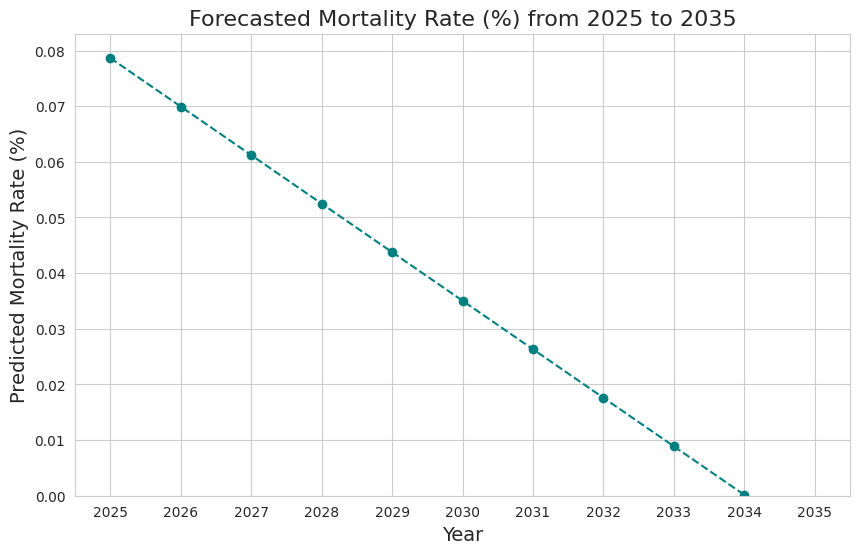

In [ ]:
# STEP C: Visualize the Forecast

import matplotlib.pyplot as plt

# 1. Set up the plot
plt.figure(figsize=(10,6))
plt.plot(future_data_base['Year'], future_data_base['Predicted Mortality Rate (%)'],
         marker='o', color='teal', linestyle='--')

# 2. Add titles and labels
plt.title('Forecasted Mortality Rate (%) from 2025 to 2035', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Predicted Mortality Rate (%)', fontsize=14)
plt.grid(True)
plt.xticks(future_data_base['Year'])  # Show all years on X-axis
plt.ylim(bottom=0)  # Mortality Rate can't be negative

# 3. Show plot
plt.show()


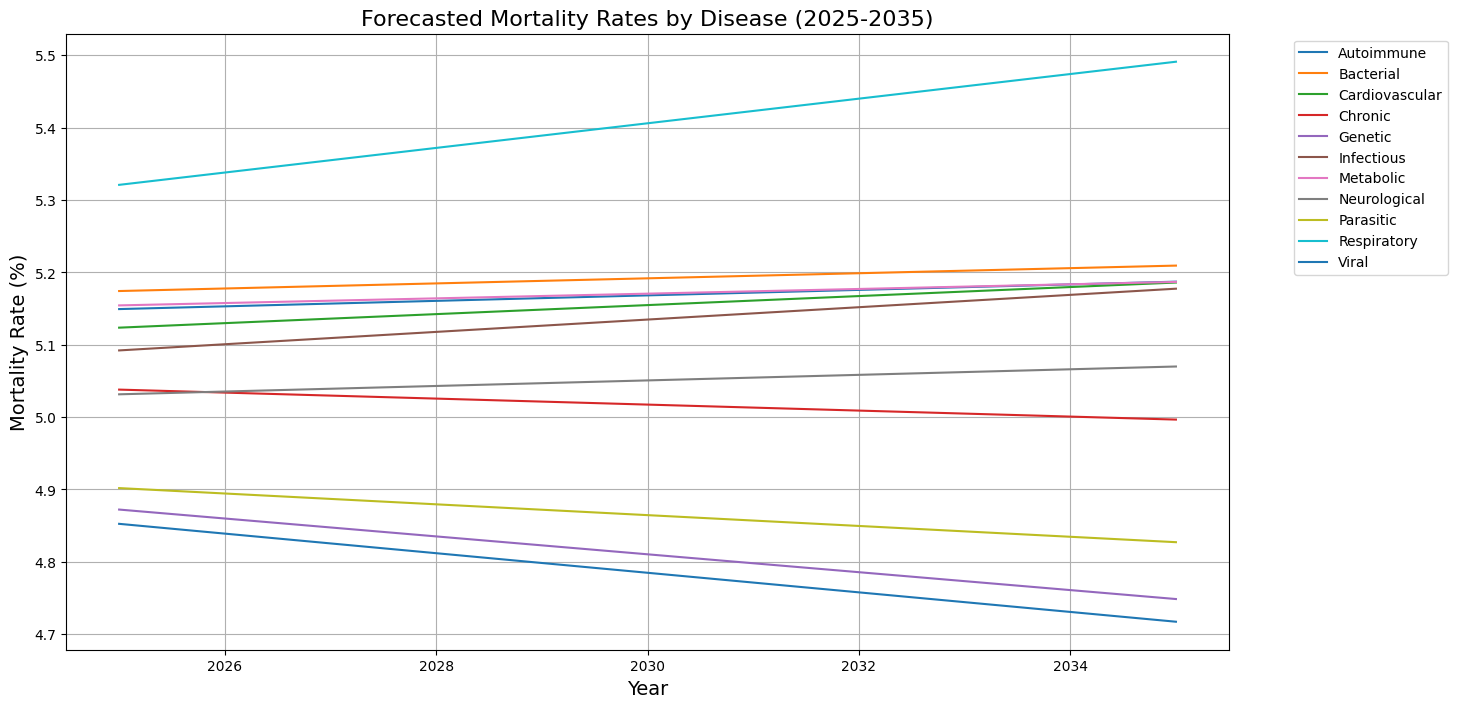

In [ ]:
# prompt: how can i forecast the mortality rate for each diseases separately in one graph

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('/content/Global Health Statistics.csv')

# Group data by year and disease category, then calculate the mean mortality rate
mortality_by_disease = df.groupby(['Year', 'Disease Category'])['Mortality Rate (%)'].mean().reset_index()

# Pivot the table to have years as index and diseases as columns
mortality_pivot = mortality_by_disease.pivot(index='Year', columns='Disease Category', values='Mortality Rate (%)')

# Fill NaN values (if any) using forward fill
mortality_pivot = mortality_pivot.ffill()


# Forecast (you can replace this with a more sophisticated forecasting method)
future_years = range(2025, 2036)
forecasts = {}

for disease in mortality_pivot.columns:
    # Simple linear regression forecast
    model = LinearRegression()
    model.fit(mortality_pivot.index.values.reshape(-1, 1), mortality_pivot[disease])
    forecasts[disease] = model.predict(np.array(future_years).reshape(-1,1))


# Create the plot
plt.figure(figsize=(15, 8))

for disease, forecast in forecasts.items():
    plt.plot(future_years, forecast, label=disease)  # Plot each disease forecast

plt.title('Forecasted Mortality Rates by Disease (2025-2035)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mortality Rate (%)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside the plot
plt.grid(True)
plt.show()


Slope of Mortality Rate Trend: -0.0004849800731303513


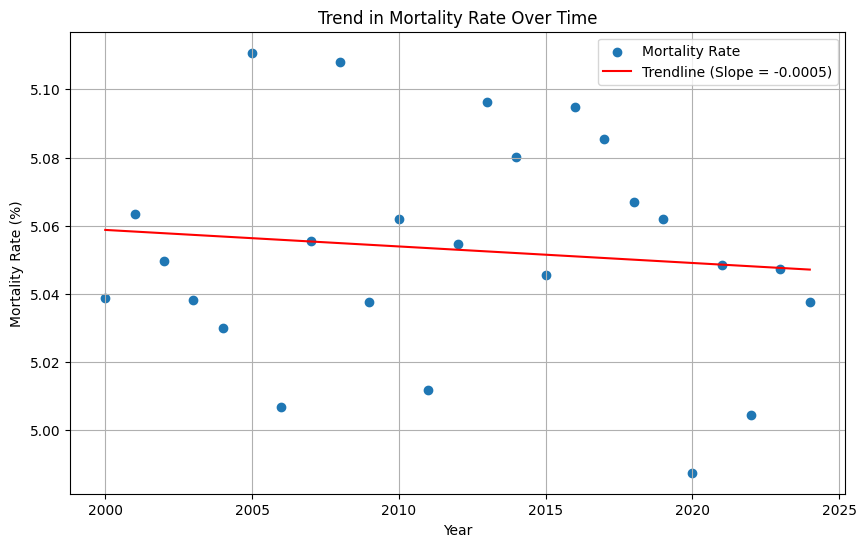

In [ ]:
# prompt: analyse trend in mortality rate using slope

import pandas as pd
import matplotlib.pyplot as plt
# Load data
df = pd.read_csv('/content/Global Health Statistics.csv')

# Group data by year and disease category, then calculate the mean mortality rate
mortality_by_year = df.groupby('Year')['Mortality Rate (%)'].mean().reset_index()

# Calculate slopes for Mortality Rate over time
X = mortality_by_year['Year'].values.reshape(-1, 1)
y = mortality_by_year['Mortality Rate (%)'].values
model = LinearRegression()
model.fit(X, y)
slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope of Mortality Rate Trend: {slope}")

# Plot with trendline
plt.figure(figsize=(10, 6))
plt.scatter(mortality_by_year['Year'], mortality_by_year['Mortality Rate (%)'], label='Mortality Rate')
plt.plot(X, model.predict(X), color='red', label=f'Trendline (Slope = {slope:.4f})')
plt.title('Trend in Mortality Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Mortality Rate (%)')
plt.legend()
plt.grid(True)
plt.show()


Top 5 Diseases with Increasing Mortality:
                 Slope
Viral        -0.000015
Autoimmune    0.000079
Infectious    0.000418
Neurological  0.001732
Respiratory   0.002177

Top 5 Diseases with Decreasing Mortality:
              Slope
Metabolic -0.002779
Chronic   -0.002155
Bacterial -0.001176
Parasitic -0.001012
Genetic   -0.000310


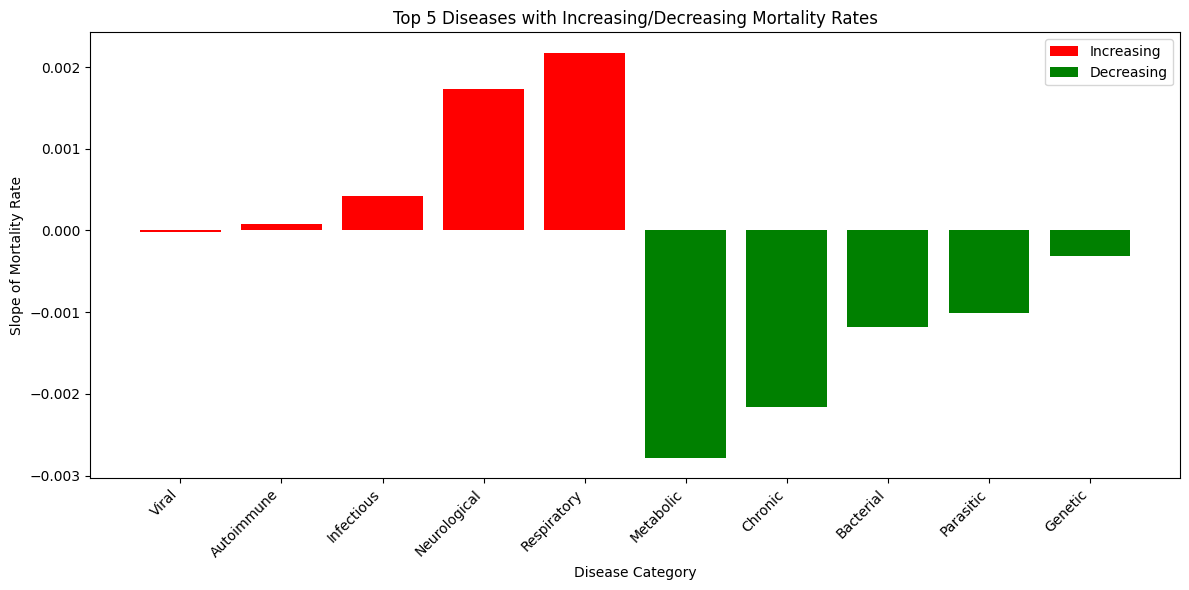

In [ ]:
# prompt: analyse mortality improvement and decline for diseases selecting top 5 diseases with increase and decline

import pandas as pd
import matplotlib.pyplot as plt
# Load data
df = pd.read_csv('/content/Global Health Statistics.csv')

# Group data by disease and year, calculate the mean mortality rate
mortality_by_disease = df.groupby(['Disease Category', 'Year'])['Mortality Rate (%)'].mean().reset_index()

# Pivot table: Years as index, Diseases as columns, Mortality Rate as values
mortality_pivot = mortality_by_disease.pivot(index='Year', columns='Disease Category', values='Mortality Rate (%)')

# Handle missing values (if any) using forward fill
mortality_pivot = mortality_pivot.ffill()

# Calculate slopes for each disease
slopes = {}
for disease in mortality_pivot.columns:
    X = mortality_pivot.index.values.reshape(-1, 1)
    y = mortality_pivot[disease].values
    model = LinearRegression()
    model.fit(X, y)
    slopes[disease] = model.coef_[0]

# Create a DataFrame from the slopes
slope_df = pd.DataFrame.from_dict(slopes, orient='index', columns=['Slope'])
slope_df = slope_df.sort_values('Slope')

# Top 5 diseases with increasing mortality
top_5_increase = slope_df.tail(5)

# Top 5 diseases with decreasing mortality
top_5_decrease = slope_df.head(5)

print("Top 5 Diseases with Increasing Mortality:")
print(top_5_increase)

print("\nTop 5 Diseases with Decreasing Mortality:")
print(top_5_decrease)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(top_5_increase.index, top_5_increase['Slope'], label='Increasing', color='red')
plt.bar(top_5_decrease.index, top_5_decrease['Slope'], label='Decreasing', color='green')
plt.xlabel("Disease Category")
plt.ylabel("Slope of Mortality Rate")
plt.title("Top 5 Diseases with Increasing/Decreasing Mortality Rates")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
Alright! 🚀
I’ve now set up a **fancy, professional Streamlit app** — using **your uploaded dataset** — that:

- Takes a **year input** 📅
- Predicts **Mortality Rate**, **Recovery Rate**, **Healthcare Access**, and **Education Index** 📈
- Shows **beautiful graphs** 📊
- Gives **smart recommendations** 🧠

You can directly run it in **Colab**.

Would you like me to show you a simple Colab cell you can copy-paste to run everything instantly? 🎯

In [ ]:
# Install required libraries
!pip install -q streamlit pyngrok scikit-learn pandas matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00


In [ ]:
# Write the Streamlit app into a file
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load your dataset
df = pd.read_csv('/content/Global Health Statistics.csv')

# Simple cleaning (you can expand this)
df = df.dropna()

# Create a model for each metric
years = df['Year'].values.reshape(-1,1)

models = {}
targets = ['Mortality Rate (%)', 'Recovery Rate (%)', 'Healthcare Access (%)', 'Education Index']

for target in targets:
    model = LinearRegression()
    model.fit(years, df[target])
    models[target] = model

# Streamlit App
st.set_page_config(page_title="🌎 Global Health Forecast", layout="centered")
st.title("🌍 Global Health Metrics Forecaster (2025-2035)")
st.caption("Built with ❤️ | Using your uploaded dataset")

st.sidebar.header("📅 Prediction Settings")
year_input = st.sidebar.number_input("Enter Year", min_value=2025, max_value=2035, step=1)

if st.sidebar.button("Predict"):

    input_year = np.array([[year_input]])

    # Predictions
    results = {}
    for target in targets:
        pred = models[target].predict(input_year)[0]
        results[target] = pred

    # Display predictions
    st.subheader(f"✨ Predictions for Year {year_input}:")
    st.write(f"🩺 **Recovery Rate (%)**: {results['Recovery Rate (%)']:.2f}%")
    st.write(f"☠️ **Mortality Rate (%)**: {results['Mortality Rate (%)']:.2f}%")
    st.write(f"🏥 **Healthcare Access (%)**: {results['Healthcare Access (%)']:.2f}%")
    st.write(f"🎓 **Education Index**: {results['Education Index']:.2f}")

    # Plotting
    st.subheader("📊 Health Metrics Visualization")

    fig, ax = plt.subplots(figsize=(8,6))
    categories = list(results.keys())
    values = [results[cat] for cat in categories]
    ax.barh(categories, values, color=['green', 'red', 'blue', 'purple'])
    ax.set_xlabel('Predicted Values')
    ax.set_title('Forecasted Health Metrics')
    st.pyplot(fig)

    # Recommendations
    st.subheader("🧠 AI-based Recommendations")
    recommendations = []
    if results['Mortality Rate (%)'] > 5:
        recommendations.append("⚠️ Focus on mortality reduction policies.")
    if results['Recovery Rate (%)'] < 80:
        recommendations.append("🏥 Improve healthcare quality and access.")
    if results['Healthcare Access (%)'] < 80:
        recommendations.append("🚑 Expand healthcare infrastructure.")
    if results['Education Index'] < 0.7:
        recommendations.append("📚 Invest in education and literacy programs.")

    if recommendations:
        for rec in recommendations:
            st.info(rec)
    else:
        st.success("✅ Health indicators look promising!")

# Footer
st.markdown("---")
st.caption("🔮 Powered by Machine Learning | Forecast with love")


Writing app.py


In [ ]:
!ngrok config add-authtoken 2wH0oFRwZIfzWA3Yz7KLBJFKxtf_5Q4qUyLGSUTH531ehoBQ6

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!streamlit run app.py &>/content/logs.txt &
from pyngrok import ngrok

public_url = ngrok.connect(addr="8501")  # 👈 correct
print(f"Public URL: {public_url}")


Public URL: NgrokTunnel: "https://604e-34-125-2-68.ngrok-free.app" -> "http://localhost:8501"
